In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [18]:
# Load the CSV data
df = pd.read_csv('cleaned_heart_disease_kmodes.csv')
# df = pd.read_csv('cleaned_heart_disease_majority.csv')
# df = pd.read_csv('heart_disease_remove_empty.csv')

In [19]:
def Age_with_X(X):
    '''
    explore factor X with Heart disease rate among different age
    '''
    # Mapping Heart Disease Status from categorical ('Yes'/'No') to binary (1/0)
    if df['Heart Disease Status'].dtype == 'O': 
        mapping = {'Yes': 1, 'No': 0}
        df['Heart Disease Status'] = df['Heart Disease Status'].map(mapping)

    # Create age groups 
    bins = [0, 30, 40, 50, 60, 70, 80, 100]
    labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    # Group by AgeGroup and Smoking to calculate the average (proportion) of heart disease.
    # Since Heart Disease Status is 0/1, the mean gives the proportion of cases.
    result = df.groupby(['AgeGroup', X])['Heart Disease Status'].mean().reset_index()
    # print("Heart Disease Proportion by Age Group and %s Status:" % X)
    # print(result)

    # Visualize the proportions with a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=result, x='AgeGroup', y='Heart Disease Status', hue= X)
    plt.ylabel('Proportion with Heart Disease')
    plt.title('Heart Disease Proportion by %s Status and Age Group' % X)

    # Save the figure before showing it
    filename = f'heart_disease_proportion_by_{X}.png'  # Saves dynamically based on X
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save at high quality

    # plt.show()


C:\Users\zqy15\AppData\Local\Temp\ipykernel_52460\829646155.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(['AgeGroup', X])['Heart Disease Status'].mean().reset_index()
C:\Users\zqy15\AppData\Local\Temp\ipykernel_52460\829646155.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(['AgeGroup', X])['Heart Disease Status'].mean().reset_index()
C:\Users\zqy15\AppData\Local\Temp\ipykernel_52460\829646155.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

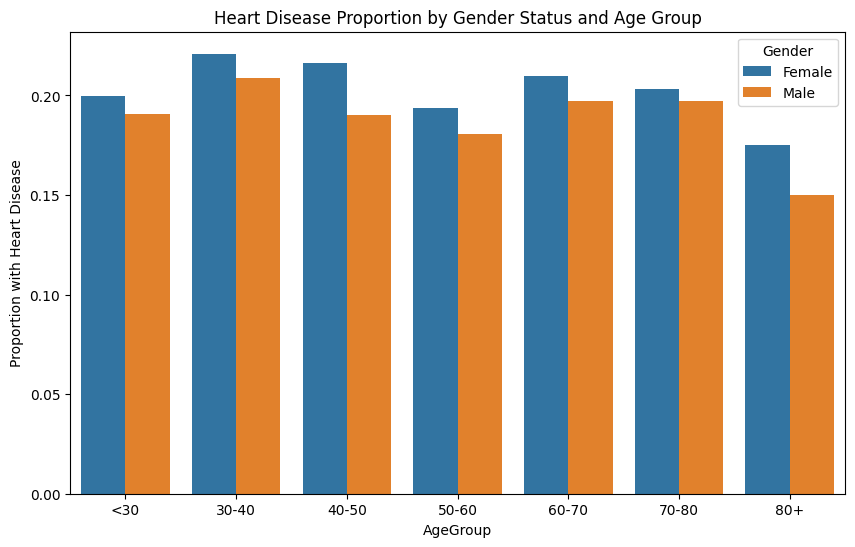

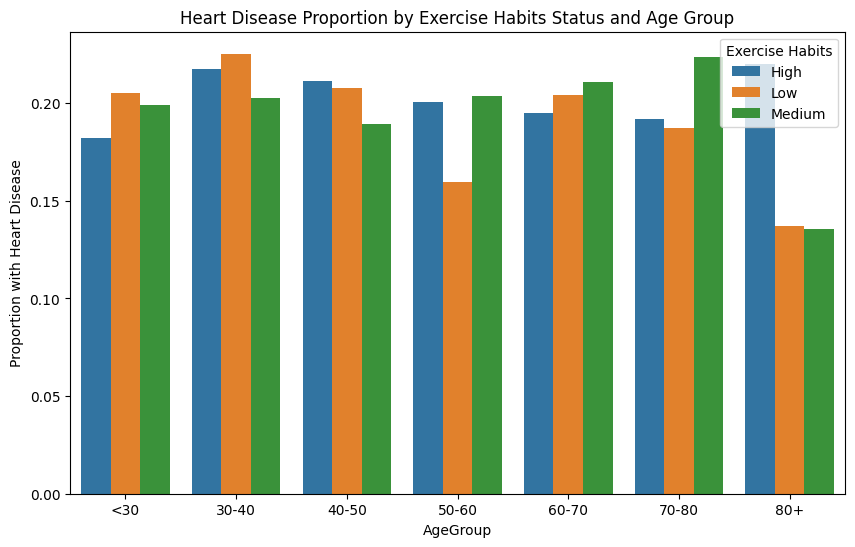

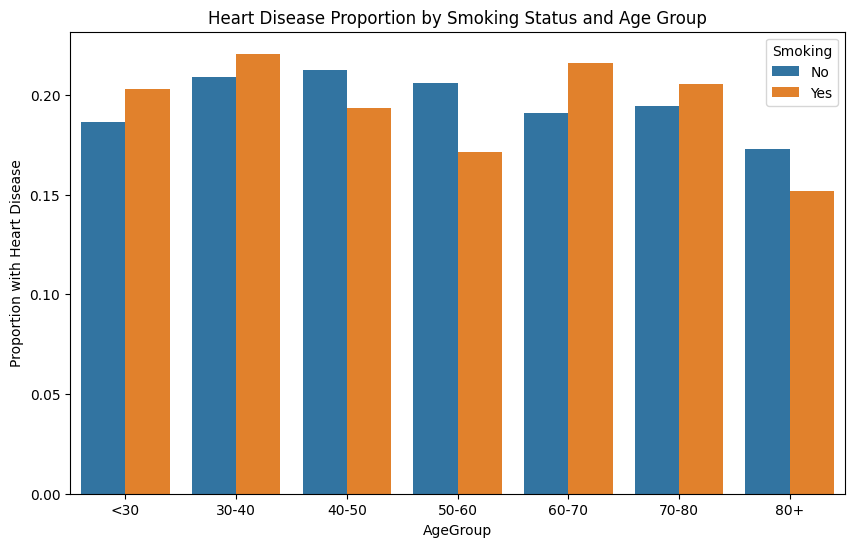

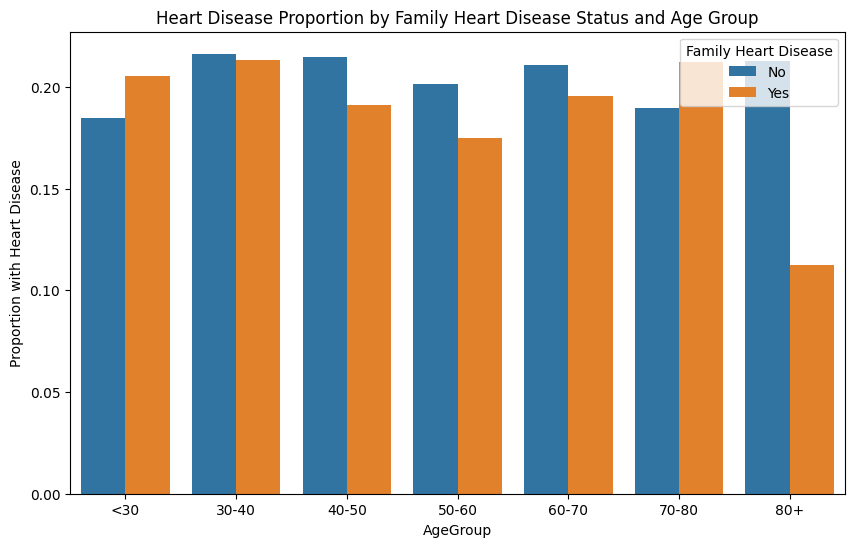

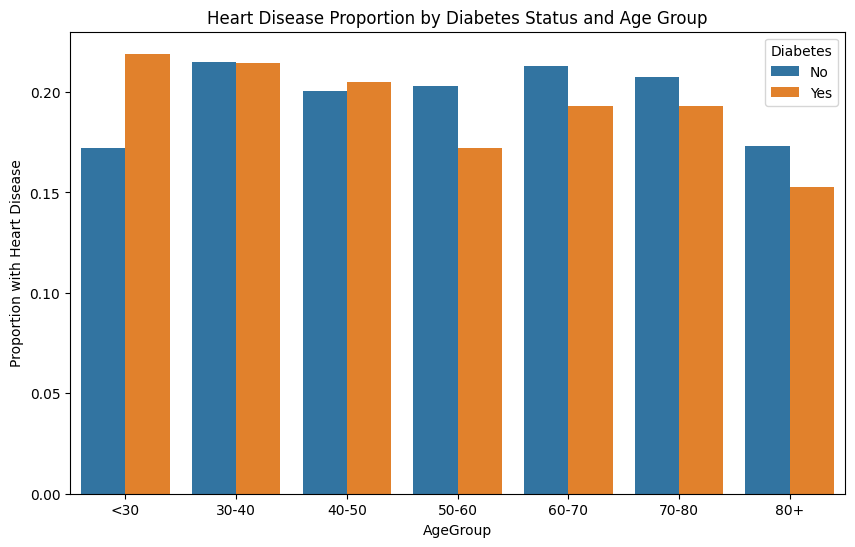

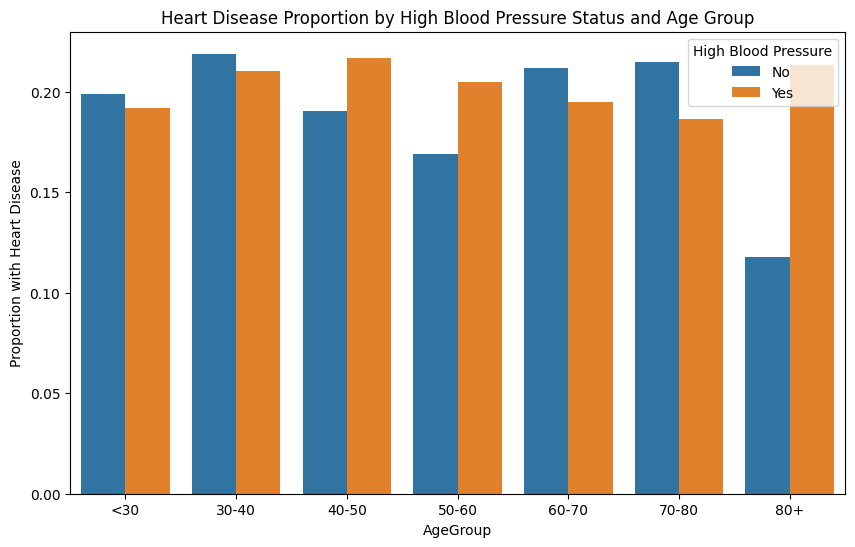

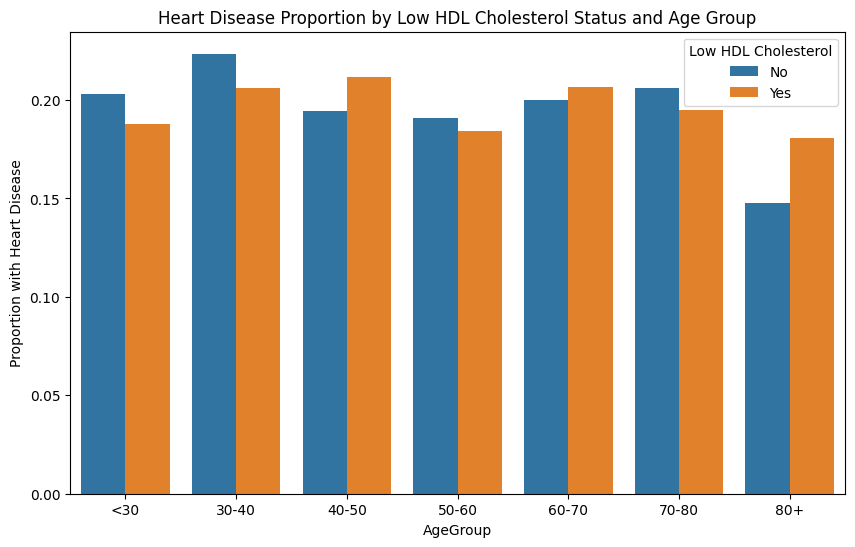

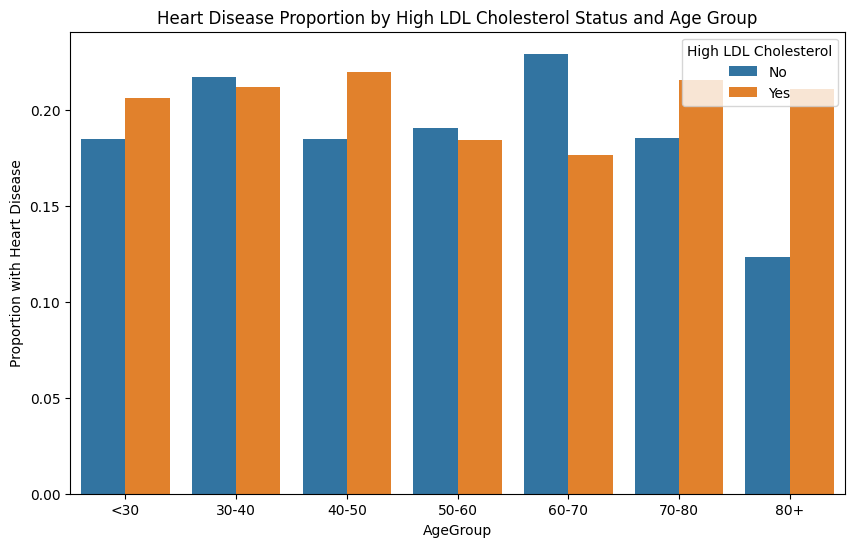

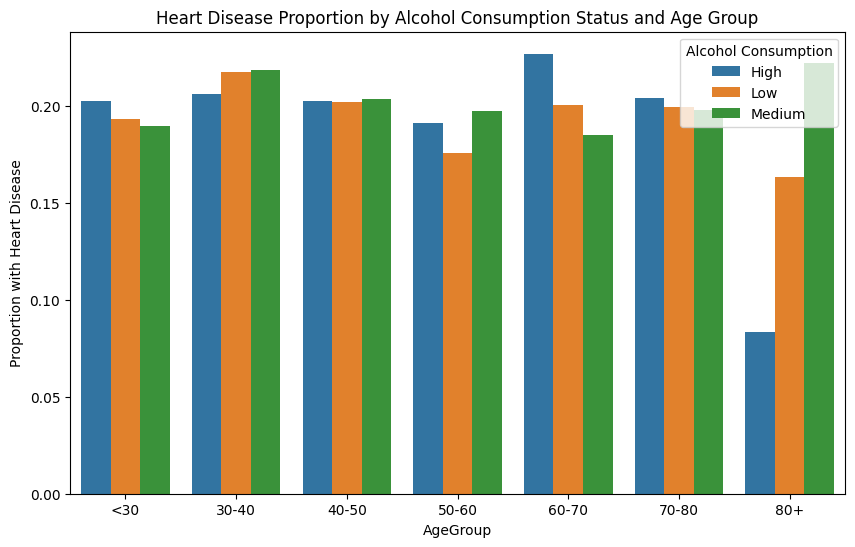

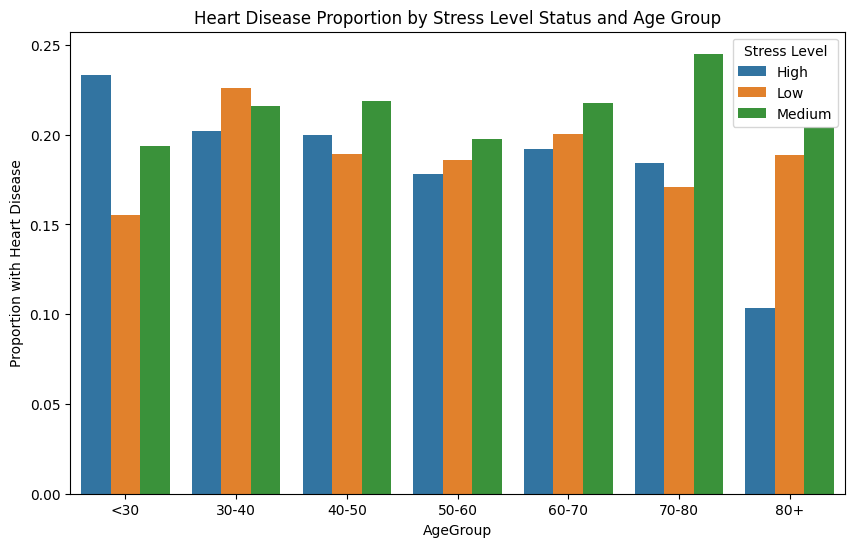

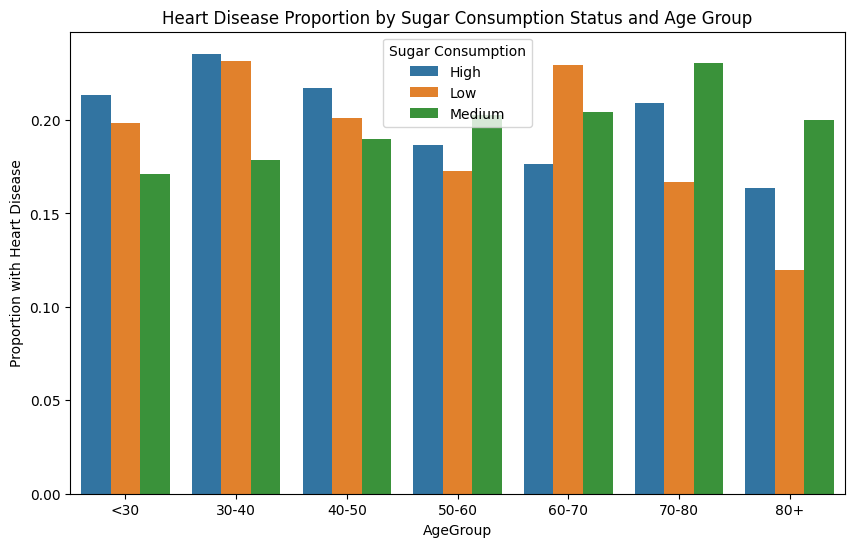

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

for cate in categorical_columns[:len(categorical_columns)-1]:
    Age_with_X(cate)


In [ ]:
# Additionally, perform a chi-squared test for each age group to test the association
def chi2_test_age_group(group,X):
    # Create a contingency table for Smoking vs. Heart Disease Status
    contingency_table = pd.crosstab(group[X], group['Heart Disease Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return pd.Series({'Chi2': chi2, 'p-value': p, 'Degrees of Freedom': dof})


In [ ]:
'''
chi2
'''

chi2_results = df.groupby('AgeGroup').apply(lambda g:chi2_test_age_group(g,'Smoking')).reset_index()
print("\nChi-squared Test Results by Age Group:")
print(chi2_results)


Exercise Habit Distribution by Age Group:
   AgeGroup Exercise Habits  Count  Proportion
0       <30            High    639    0.350329
1       <30             Low    588    0.322368
2       <30          Medium    597    0.327303
3     30-40            High    536    0.331683
4     30-40             Low    504    0.311881
5     30-40          Medium    576    0.356436
6     40-50            High    542    0.339386
7     40-50             Low    528    0.330620
8     40-50          Medium    527    0.329994
9     50-60            High    520    0.332907
10    50-60             Low    531    0.339949
11    50-60          Medium    511    0.327145
12    60-70            High    532    0.336922
13    60-70             Low    513    0.324889
14    60-70          Medium    534    0.338189
15    70-80            High    578    0.347774
16    70-80             Low    556    0.334537
17    70-80          Medium    528    0.317690
18      80+            High     50    0.312500
19      80+       

C:\Users\zqy15\AppData\Local\Temp\ipykernel_52460\2224317007.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exercise_distribution = df.groupby(['AgeGroup', 'Exercise Habits']).size().reset_index(name='Count')
C:\Users\zqy15\AppData\Local\Temp\ipykernel_52460\2224317007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exercise_distribution['Proportion'] = exercise_distribution.groupby('AgeGroup')['Count'].transform(lambda x: x / x.sum())


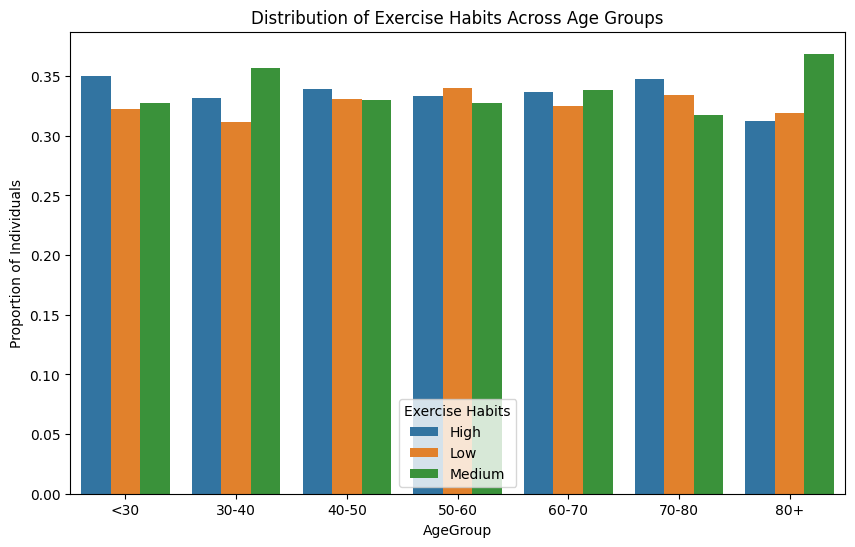

In [15]:
'''
exercise habit and age
'''
# Define the age bins and labels for grouping
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of each exercise habit within each age group
exercise_distribution = df.groupby(['AgeGroup', 'Exercise Habits']).size().reset_index(name='Count')

# Normalize within each age group to get proportions
exercise_distribution['Proportion'] = exercise_distribution.groupby('AgeGroup')['Count'].transform(lambda x: x / x.sum())

# Print the proportion data
print("Exercise Habit Distribution by Age Group:")
print(exercise_distribution)

# Plot the proportions of exercise habits within each age group
plt.figure(figsize=(10, 6))
sns.barplot(data=exercise_distribution, x='AgeGroup', y='Proportion', hue='Exercise Habits')
plt.ylabel('Proportion of Individuals')
plt.title('Distribution of Exercise Habits Across Age Groups')
plt.legend(title='Exercise Habits')
plt.show()